In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from src.utils import read_pickle

atts_vec = read_pickle("output/cd_24x128_p1_more_complex_20220803_94d2/atts_vec.pkl")

In [3]:
clus_labels = read_pickle(f"output/cd_24x128_p1_more_complex_20220803_94d2/clus_labels.pkl")

In [6]:
import umap

mapper = umap.UMAP().fit(atts_vec)

In [8]:
from src.vit_data import load_cd_data_24x128_p1

vit_data = load_cd_data_24x128_p1()

In [18]:
idx_120 = np.arange(len(vit_data))[vit_data.times == 120]
tpm_120 = vit_data.unscaled_TPM[idx_120]
log_tpm = np.log2(tpm_120+1)

(array([  14.,   81.,  528., 1604., 1378.,  558.,  183.,   57.,   17.,
           7.]),
 array([ 0.68729119,  2.10368084,  3.52007049,  4.93646013,  6.35284978,
         7.76923943,  9.18562907, 10.60201872, 12.01840837, 13.43479802,
        14.85118766]),
 <BarContainer object of 10 artists>)

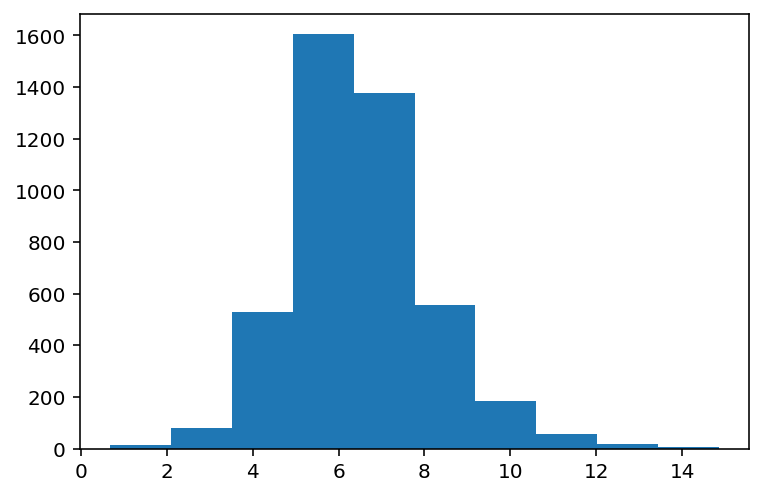

In [19]:
plt.hist(log_tpm)

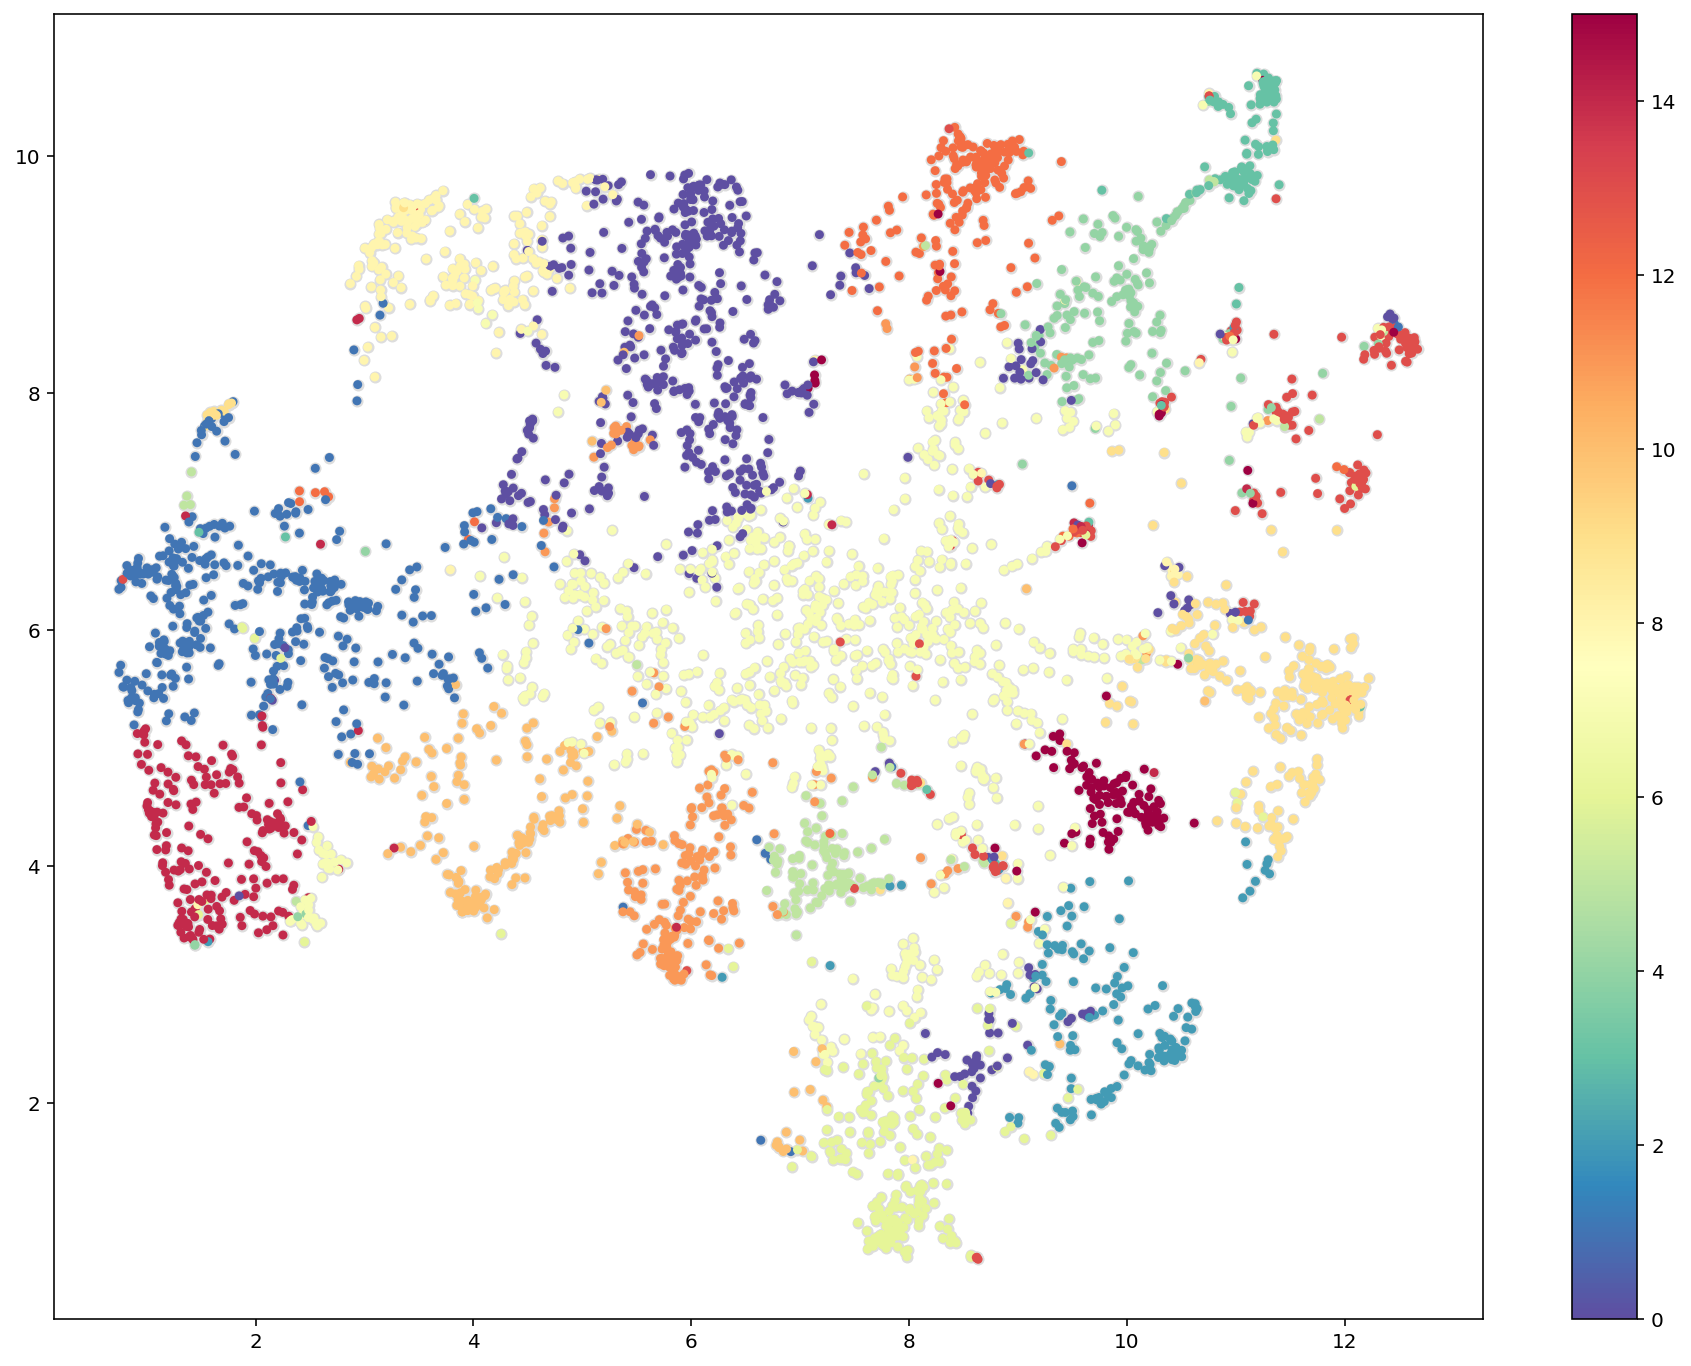

In [22]:
plt.figure(figsize=(16, 12))
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=25, facecolor='none', 
            c='#dddddd', zorder=1)
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=20, edgecolor='none', 
            c=clus_labels, cmap='Spectral_r', alpha=1., zorder=2)
plt.colorbar()

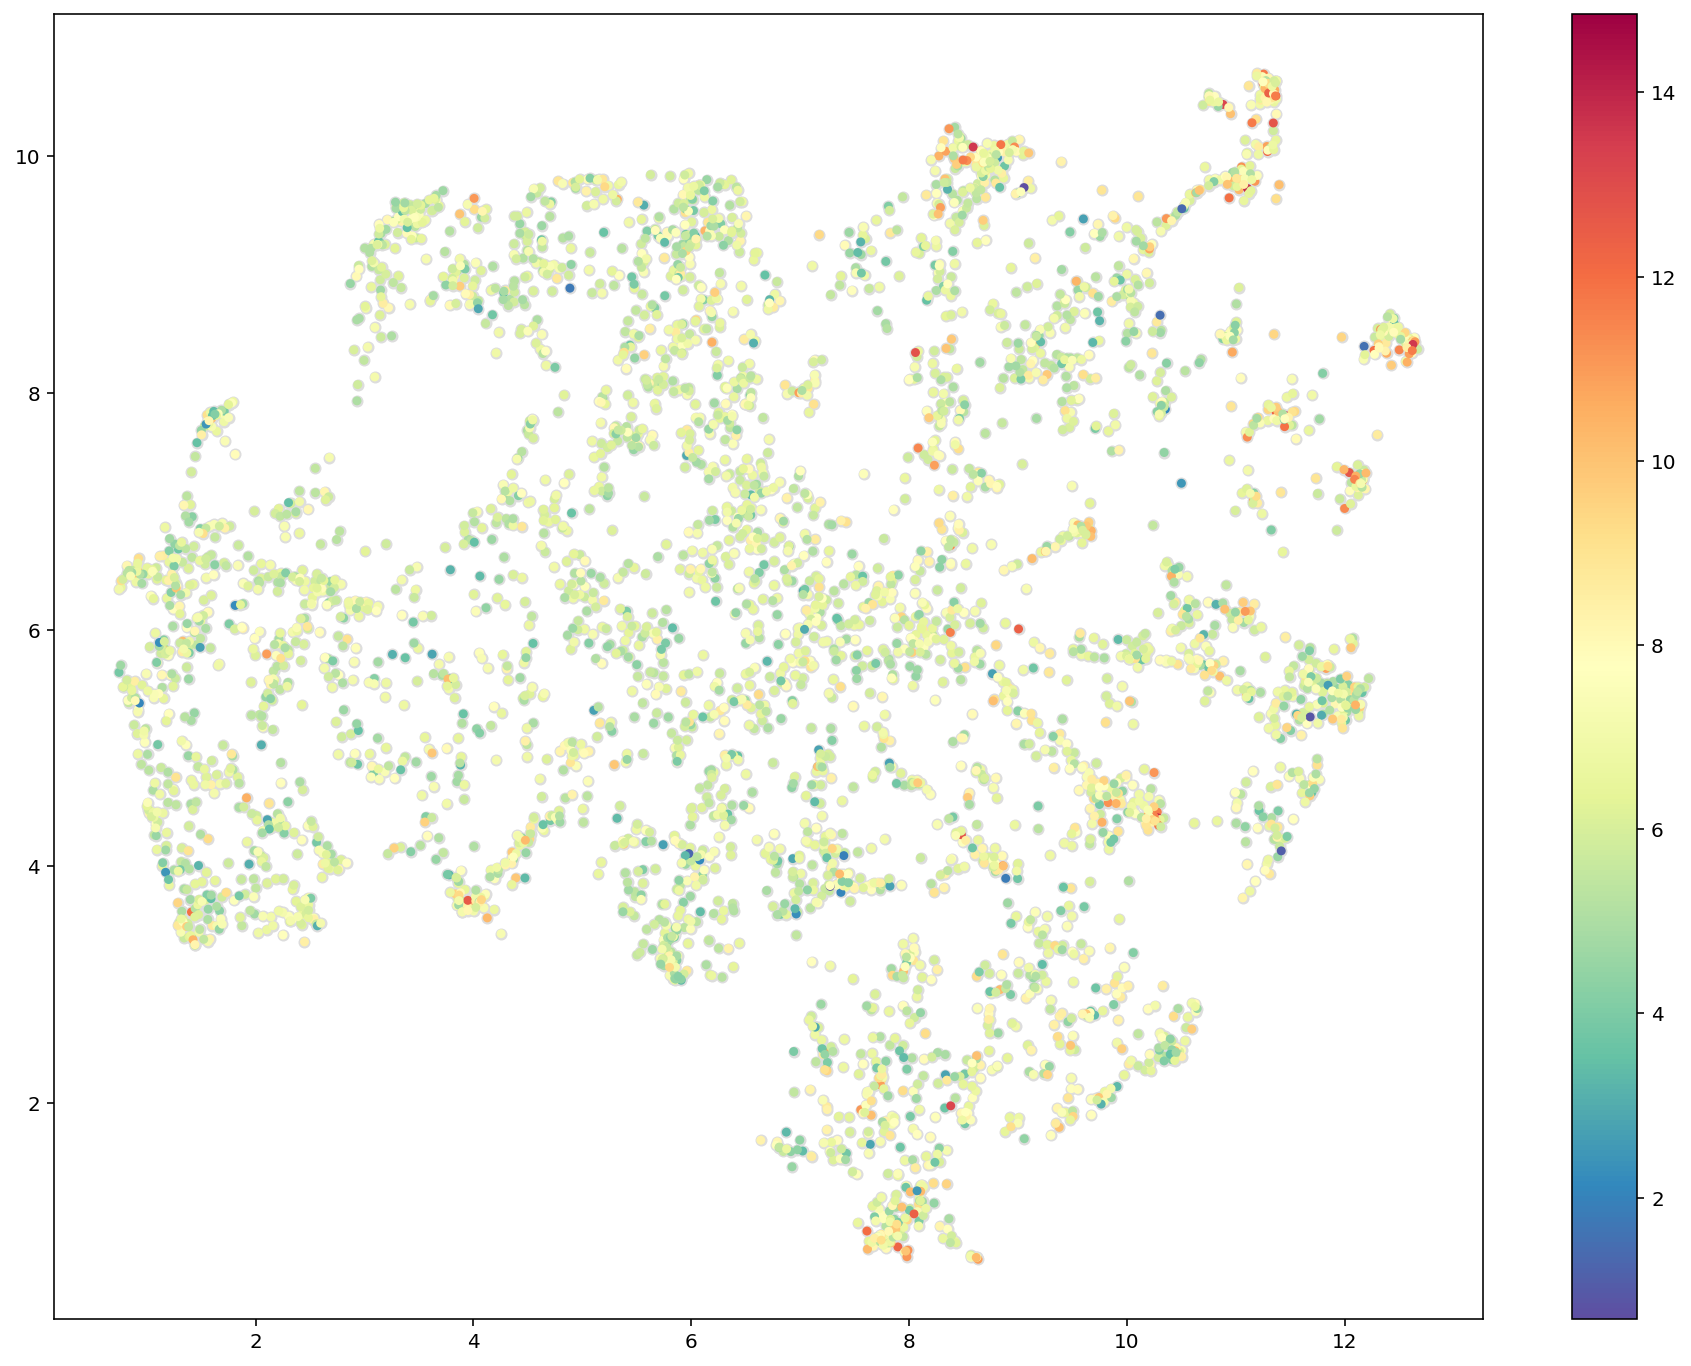

In [21]:
plt.figure(figsize=(16, 12))
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=25, facecolor='none', 
            c='#dddddd', zorder=1)
plt.scatter(mapper.embedding_[:, 0], mapper.embedding_[:, 1], s=20, edgecolor='none', 
            c=log_tpm, cmap='Spectral_r', alpha=1., zorder=2)
plt.colorbar()